In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [43]:
df = pd.read_csv('data/ten_year.csv')
df['date'] = pd.to_datetime(df['update'],format='%d/%m/%Y %H:%M:%S').dt.date
df = df.drop(columns='update')

In [44]:
df_pnj = df[df['type']=='PNJ']
df_sjc = df[df['type']=='SJC']

In [45]:
df_pnj.to_csv('data/PNJ.csv')
df_sjc.to_csv('data/SJC.csv')

In [46]:
df.groupby('type')['sell'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
PNJ,12121.0,42.521313,11.021850,29.50,33.46,36.12,53.10,75.7
SJC,12119.0,46.598107,14.522336,32.32,35.63,36.67,56.55,354.3


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24240 entries, 0 to 24239
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    24240 non-null  object 
 1   buy     24240 non-null  float64
 2   sell    24240 non-null  float64
 3   date    24240 non-null  object 
dtypes: float64(2), object(2)
memory usage: 757.6+ KB


In [48]:
df.shape

(24240, 4)

In [49]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [50]:
df.duplicated().sum()

8630

In [51]:
df = df.drop_duplicates()

In [52]:
df.shape

(15610, 4)

In [53]:
df.head()

,type,buy,sell,date
0,SJC,36.82,36.65,2014-06-23
1,PNJ,34.30,34.10,2014-06-23
7,PNJ,34.35,34.15,2014-06-23
9,SJC,36.81,36.69,2014-06-23
10,SJC,36.84,36.72,2014-06-23


In [54]:
df.isnull().sum().sum()

0

In [62]:
df_sjc = df_sjc.drop_duplicates(subset=['date'])
df_pnj = df_pnj.drop_duplicates(subset=['date'])

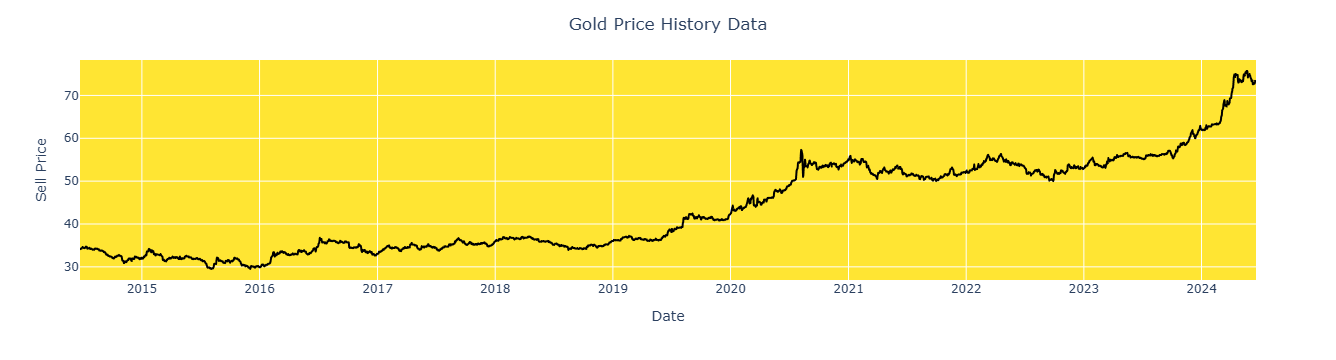

In [63]:
fig = px.line(y=df_pnj.sell, x=df_pnj.date)
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Sell Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

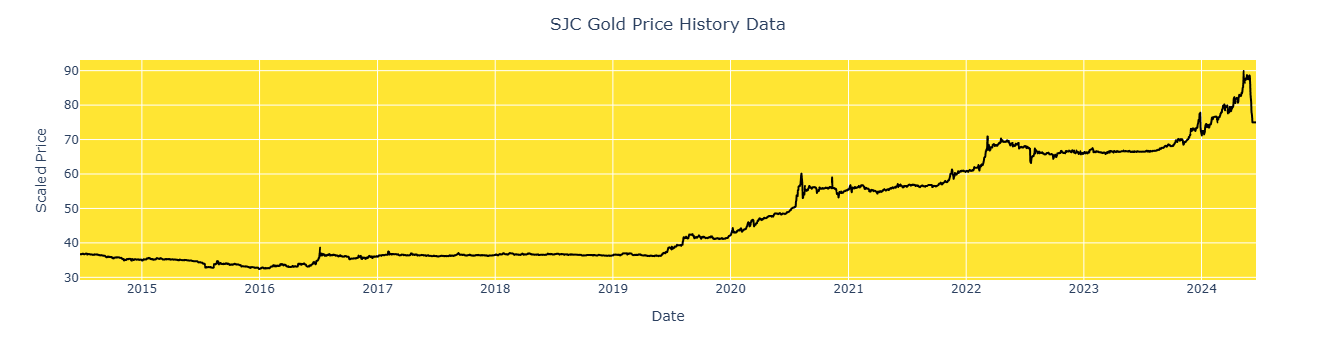

In [64]:
df_sjc = df_sjc.drop_duplicates(subset=['date'])
fig = px.line(y=df_sjc.sell, x=df_sjc.date)
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scaled Price",
                  title={'text': "SJC Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')